# <u>CSC2034 Contemporary Topics: Data Science</u>

## Imports 

In [797]:
import sklearn as sk
import sklearn.metrics as metrics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

<br>

# Task 1

For this task, I performed an Exploratory Data Analysis (EDA) on the <span style="color:darkred">**red**</span> and <span style="color:gainsboro">**white**</span> wine datasets. The performed analysis includes aggregations, summary statistics and plots to further understand features such as `quality` in both datasets. The obtained results, will then allow for a more exhaustive comparison of `quality` between the two sets.

<u>Note:</u> Although the amount of <span style="color:gainsboro">**white**</span> wine samples(4898) is much greater than the amount of <span style="color:darkred">**red**</span> wine samples(1599), I will focus on the analysis of the set's features rather than the number of samples. This is to avoid possibly skewing the data to make the number of samples equal, since correlating feature differences with the quantity of samples could mean ignoring actual correlations between the variables themselves. Therefore, the difference in the samples' quantity will only be highlighted **if relevant**.

## Task 1.a

Before plotting the data, I retrieved the CSV data, and stored it in a `pandas` DataFrame. After loading the values, I displayed a description of the `quality` column for each set. The descriptions gave an overview of the difference in `quality` for both sets, as well as in their samples.

In [ ]:
# Load the dataset from csv files
red_wine= pd.read_csv(filepath_or_buffer='winequality-red.csv', header=0, sep=';')
white_wine= pd.read_csv(filepath_or_buffer='winequality-white.csv', header=0, sep=';')

# Describe the red wine samples in terms of quality
print("\n🔴Red Wine's Quality🔴:")
display(red_wine["quality"].describe())

# Describe the white wine samples in terms of quality
print("⚪White Wine's Quality⚪:")
display(white_wine["quality"].describe())


🔴Red Wine's Quality🔴:


count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

⚪White Wine's Quality⚪:


count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

To visualise and have a deeper understanding of wines' `quality`, I created a `countplot` to visualise the `count` per every `quality` score.

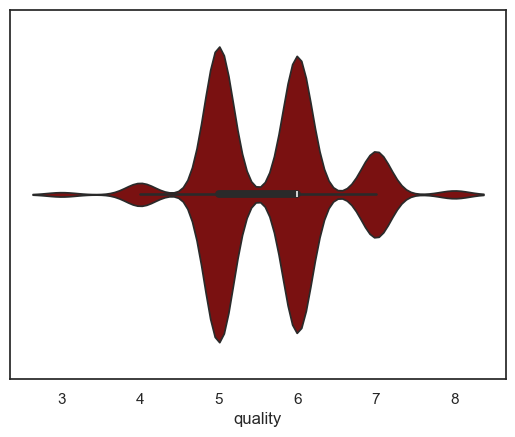

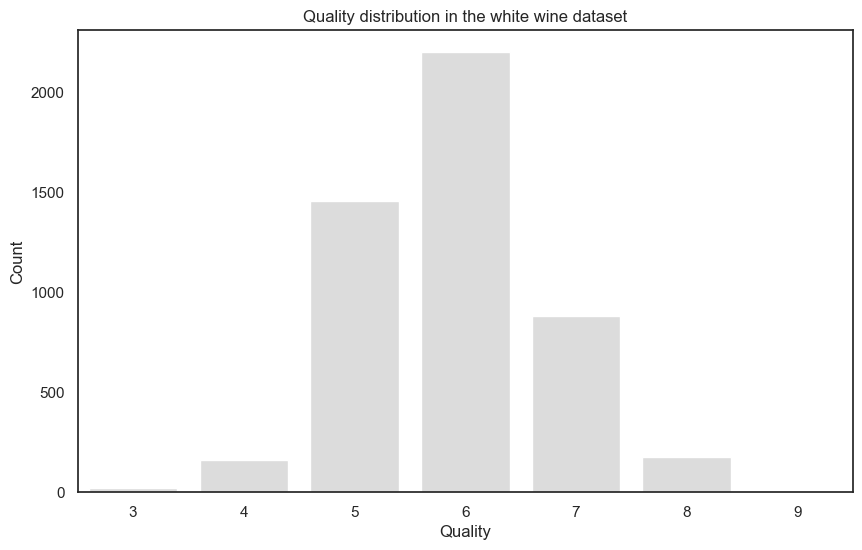

In [ ]:
# Plotting the distribution of quality in the red wine dataset
plt.figure(figsize = (10, 6))
sns.countplot(x ="quality",data=red_wine, color="darkred")
plt.title("Quality distribution in the red wine dataset")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()
plt.close()

# Plotting the distribution of quality in the white wine dataset
plt.figure(figsize = (10, 6))
sns.countplot(x ="quality",data=white_wine, color="gainsboro")
plt.title("Quality distribution in the white wine dataset")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()
plt.close()

# Talk about quality distribution

<br>

## Task 1.b

To understand the correlations of `quality` with the other features, I discretized the alcohol content into three categories, based on its distribution accross the samples. Each sample was assigned one of three values from the new column: `alcohol_cat`, which I added as part of each sets. The categories are: `low`, `mid`, and `high`; the following rules were applied for this discretisation:

* `low` = alcohol < (average - alcohol's standard deviation)
* `mid` = (average - standard deviation) < alcohol < (average + alcohol's standard deviation) 
* `high` = alcohol > (average + alcohol's standard deviation) 

These new values will allow for a much easier analysis on the correlation between `quality` and `alcohol`.

In [ ]:
# Discretize alcohol contents by creating a new column 'alcohol_cat' in the red wine dataset
red_wine['alcohol_cat'] = ['low' if x < red_wine['alcohol'].mean()-red_wine['alcohol'].std() 
                           else 'mid' if red_wine['alcohol'].mean()-red_wine['alcohol'].std() < x < red_wine['alcohol'].mean()+red_wine['alcohol'].std() 
                           else 'high' for x in red_wine['alcohol']]

# Discretize alcohol contents by creating a new column 'alcohol_cat' in the white wine dataset
white_wine['alcohol_cat'] = ['low' if x < white_wine['alcohol'].mean()-white_wine['alcohol'].std() 
                           else 'mid' if white_wine['alcohol'].mean()-white_wine['alcohol'].std() < x < white_wine['alcohol'].mean()+white_wine['alcohol'].std() 
                           else 'high' for x in white_wine['alcohol']]

<br>

## Task 1.c

Now that `alcohol` has been discretized into the `alcohol_cat` values, I performed descriptions in the `quality` distribution such as in **Task 1.a** but separately for each of the three categories.

Also like in **Task 1.a**, I added visualisation to have clearer analysis of the distribution of `quality`. Instead of a `countplot`, I used a `boxplot` to simultaneously compare each of the categories.

🔴Red Wine's Alcohol Categories🔴:

🔴Category🔴: mid


count    1125.000000
mean        5.526222
std         0.746568
min         3.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

🔴Category🔴: low


count    194.000000
mean       5.247423
std        0.611308
min        3.000000
25%        5.000000
50%        5.000000
75%        6.000000
max        7.000000
Name: quality, dtype: float64

🔴Category🔴: high


count    280.000000
mean       6.346429
std        0.755853
min        4.000000
25%        6.000000
50%        6.000000
75%        7.000000
max        8.000000
Name: quality, dtype: float64


⚪White Wine's Alcohol Categories⚪:

⚪Category⚪: low


count    845.000000
mean       5.547929
std        0.814057
min        3.000000
25%        5.000000
50%        5.000000
75%        6.000000
max        8.000000
Name: quality, dtype: float64

⚪Category⚪: mid


count    3121.000000
mean        5.766741
std         0.821620
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

⚪Category⚪: high


count    932.000000
mean       6.549356
std        0.819165
min        3.000000
25%        6.000000
50%        7.000000
75%        7.000000
max        9.000000
Name: quality, dtype: float64

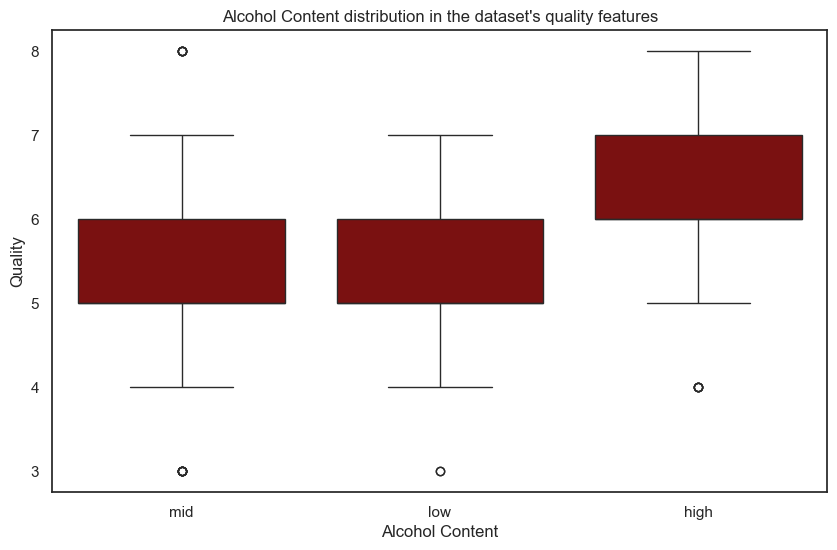

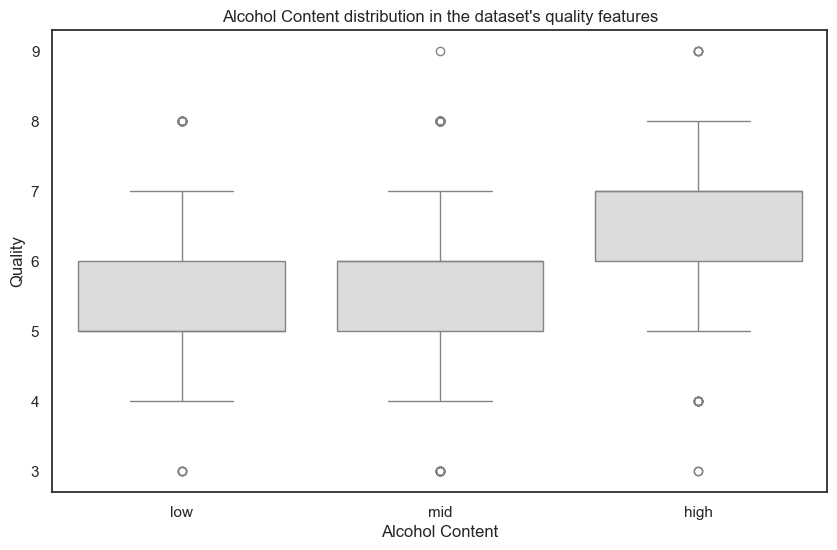

In [ ]:
# Describe the quality of red wines based on alcohol categories
print("🔴Red Wine's Alcohol Categories🔴:\n")

for category in red_wine["alcohol_cat"].unique():
    red_wine_subset = red_wine[red_wine["alcohol_cat"] == category]
    print(f"🔴Category🔴: {category}")
    display(red_wine_subset["quality"].describe())
    
# Describe the quality of white wines based on alcohol categories
print("\n⚪White Wine's Alcohol Categories⚪:\n")

# Loop through each unique alcohol category in white wine and display the quality statistics
for category in white_wine["alcohol_cat"].unique():
    white_wine_subset = white_wine[white_wine["alcohol_cat"] == category]
    print(f"⚪Category⚪: {category}")
    display(white_wine_subset["quality"].describe())
    

# Plotting the distribution of alcohol content in red wine samples
plt.figure(figsize = (10, 6))
sns.boxplot(x=red_wine["alcohol_cat"], y=red_wine["quality"], color="darkred")
plt.title("Alcohol Content distribution in the dataset's quality features")
plt.xlabel("Alcohol Content")
plt.ylabel("Quality")
plt.show()
plt.close()

# Plotting the distribution of alcohol content in white wine samples
plt.figure(figsize = (10, 6))
sns.boxplot(x=white_wine["alcohol_cat"], y=white_wine["quality"], color="gainsboro")
plt.title("Alcohol Content distribution in the dataset's quality features")
plt.xlabel("Alcohol Content")
plt.ylabel("Quality")
plt.show()
plt.close()

Based on the descriptions and the graphs, both <span style="color:darkred">**red**</span> **and** <span style="color:gainsboro">**white**</span>  wines with a `high` alcohol category have higher amounts of perceived `quality` than the samples with `mid` and `low` alcohol contents. 

This can be seen on the **boxplot** where the `high` boxes are placed higher than the rest of categories. Although there are outliers from the `low` and `mid` categories that also achieve high quality scores, they are more **rare**, and are not as **regular** compared to the `high` category boxes, which is shown by the whiskers and dots.

<br>

## Task 1.d

The feature `residual_sugar` represents the amount of sugar per litre(g/L) in a wine sample. I will discretize this column just like `alcohol` into a new variable called `isSweet` to further analyze its distribution and find its correlations with `quality`.

Since the `residual_sugar` is not as accurate for both <span style="color:darkred">**red**</span> and <span style="color:gainsboro">**white**</span> wines, and most wines don't qualify as "sweet" according to **Wine Folly's** guide (Wine Folly, 2025); I found a threshold to evenly split each set:

**Red Wine:**
* dry = residual sugar < 2.11
* sweet = 2.11 < residual sugar

**White Wine:**
* dry = residual sugar < 5.20
* sweet = 5.20 < residual sugar

<br>
<br>

This split allows for a very even **sweet/dry** split for both wines:

**Red Wine:**
* Sweet = 849
* Dry = 750

**White Wine:**
* Sweet = 2458
* Dry = 2440

With this discretization, I will be able to properly analyze the correlations between `quality` and `isSweet`.

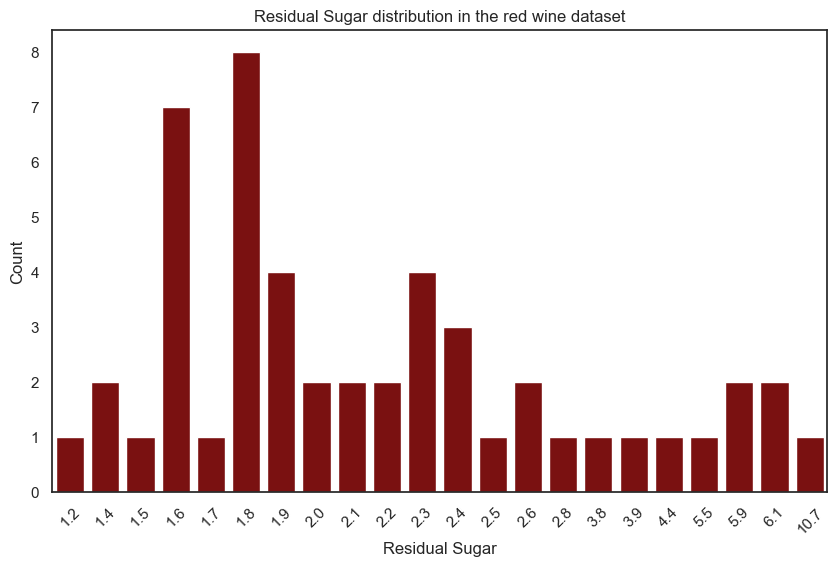

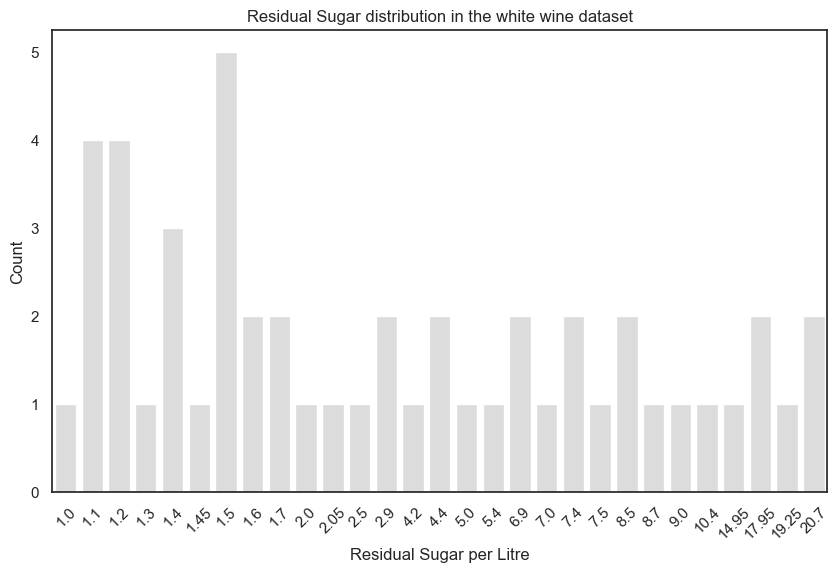

In [ ]:
# Plotting the distribution of residual sugar in red wine samples
plt.figure(figsize = (10, 6))
sns.countplot(x ="residual sugar",data=red_wine.head(50), color="darkred")
plt.title("Residual Sugar distribution in the red wine dataset")
plt.xlabel("Residual Sugar")
plt.ylabel("Count")
plt.tick_params(axis='x', rotation=45)
plt.show()
plt.close()

# Plotting the distribution of residual sugar in white wine samples
plt.figure(figsize = (10, 6))
sns.countplot(x ="residual sugar",data=white_wine.head(50), color="gainsboro")
plt.title("Residual Sugar distribution in the white wine dataset")
plt.xlabel("Residual Sugar per Litre")
plt.ylabel("Count")
plt.tick_params(axis='x', rotation=45)
plt.show()
plt.close()

In [803]:
# Discretize residual sugar contents by creating a new column 'isSweet' in both datasets
red_wine["isSweet"] = ['dry' if x < 2.11 else 'sweet' for x in red_wine["residual sugar"]]
white_wine["isSweet"] = ['dry' if x < 5.2 else 'sweet' for x in white_wine["residual sugar"]]


# Count the number of sweet and dry red wines
sweet=0
dry=0

for i in range(len(red_wine["isSweet"])):
    if red_wine["isSweet"][i] == 'sweet':
        sweet+=1
    else:
        dry+=1
print(f"🔴Red Wine's Residual Sugar🔴: \nSweet={sweet}"+"\n"+f"Dry={dry}\n")


# Count the number of sweet and dry white wines
sweet=0
dry=0

for i in range(len(white_wine["isSweet"])):
    if white_wine["isSweet"][i] == 'sweet':
        sweet+=1
    else:
        dry+=1
        
print(f"⚪White Wine's  Residual Sugar⚪: \nSweet={sweet}"+"\n"+f"Dry={dry}")

🔴Red Wine's Residual Sugar🔴: 
Sweet=849
Dry=750

⚪White Wine's  Residual Sugar⚪: 
Sweet=2458
Dry=2440


<br>

## Task 1.e

After obtaining the number of samples considered `dry` and `sweet`, I created another `boxplot` to analyze the distribution of `residual_sugar` and find if its correlated with `quality`, in a similar way to **Task 1.d**.

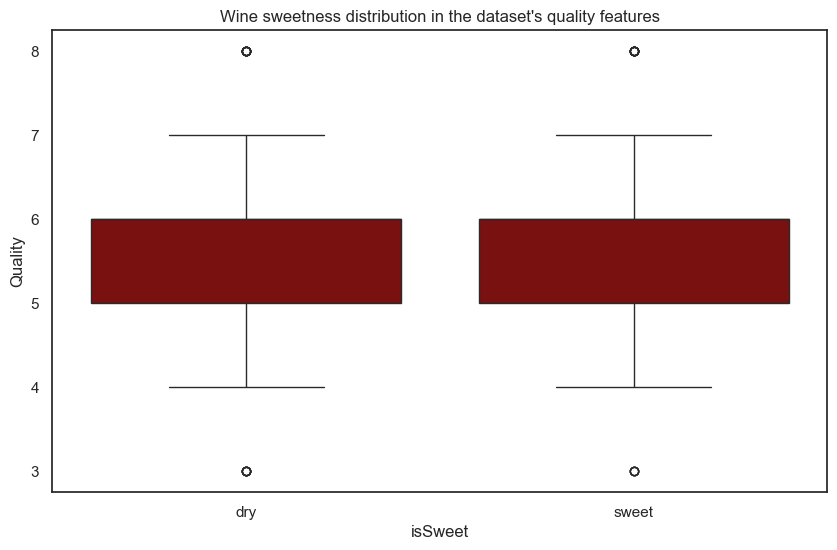

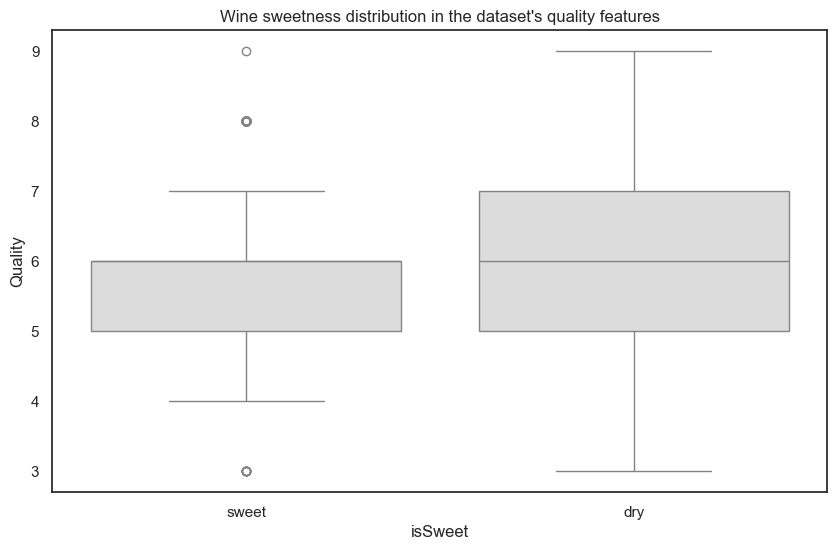

In [ ]:
# Plotting the distribution of wine sweetness in red wine samples
plt.figure(figsize = (10, 6))
sns.boxplot(x=red_wine["isSweet"], y=red_wine["quality"], color="darkred")
plt.title("Wine sweetness distribution in the dataset's quality features")
plt.ylabel("Quality")
plt.show()
plt.close()

# Plotting the distribution of wine sweetness in white wine samples
plt.figure(figsize = (10, 6))
sns.boxplot(x=white_wine["isSweet"], y=white_wine["quality"], color="gainsboro")
plt.title("Wine sweetness distribution in the dataset's quality features")
plt.ylabel("Quality")
plt.show()
plt.close()

After analyzing the graph, the <span style="color:darkred">**red**</span> wine samples' `quality` seems to be perceived about the same for both sweet and dry wines, with most of the samples scoring between 5 and 6 in `quality`, with outliers between 3 and 8.

However, for <span style="color:gainsboro">**white**</span> wines samples' `quality` is perceived higher for dry wines than for sweet wines. This is due to most of the dry samples scoring between 5 to 7 in `quality`, while sweet samples mainly score between 5 to 6. Sweet <span style="color:gainsboro">**white**</span> wines, do score higher than sweet <span style="color:darkred">**red**</span> wines, by having outlying samples in 8 and 9; which is a score (1 point) higher than <span style="color:darkred">**red**</span> wines.

But, dry <span style="color:gainsboro">**white**</span> wines show a higher consistency in outliers from 7 to 9, which shows a higher perceived quality than the sweeter samples. However the set also shows a consistent amount of outliers between 3 to 5 in perceived `quality`, which shows dry samples can also have poorer quality than sweet <span style="color:gainsboro">**white**</span> wines and all <span style="color:darkred">**red**</span> wines.

# Extension 1:

As an extension to this task, I performed additional descriptive analysis, by illustrating `quality` with respect to both `isSweet` and `alcohol_cat` in a `barplot`. This analysis demonstrates how `quality` is represented differently when analyzed separately for <span style="color:darkred">**red**</span> and <span style="color:gainsboro">**white**</span> wines, and also in a **combined** set of both wines . 


🔴Red Wine's Further Analysis🔴:

⚪White Wine's Further Analysis⚪:

🔴⚪Combined Dataset Analysis⚪🔴:


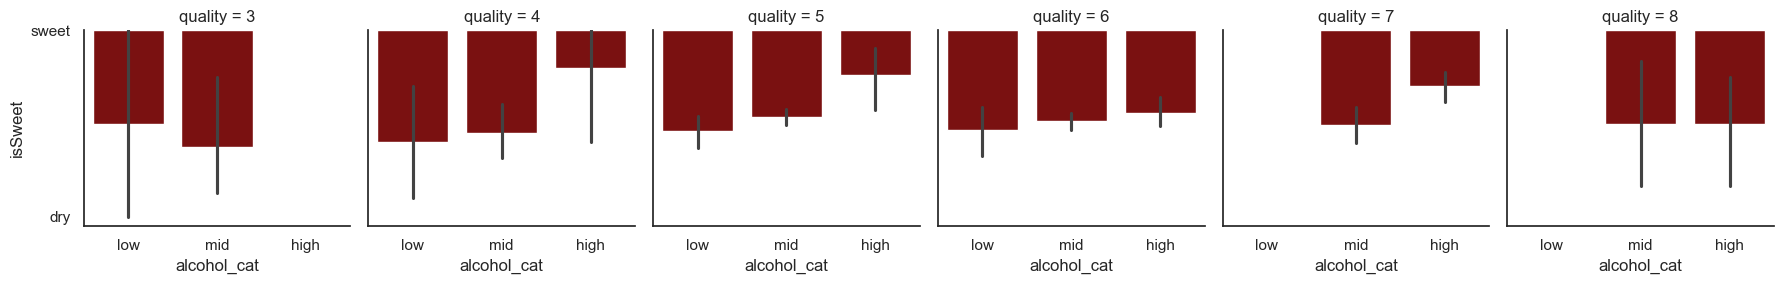

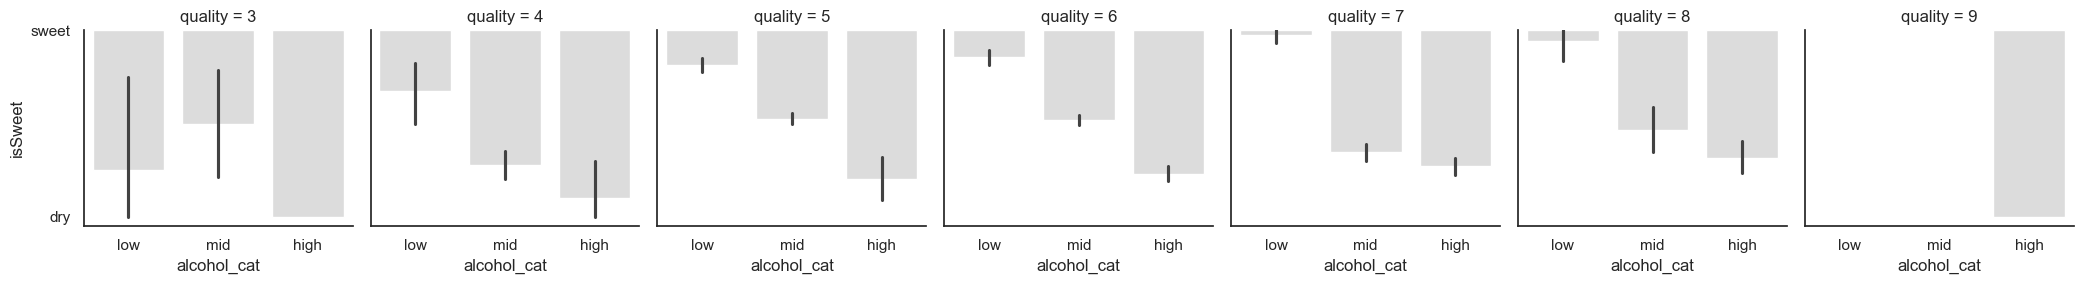

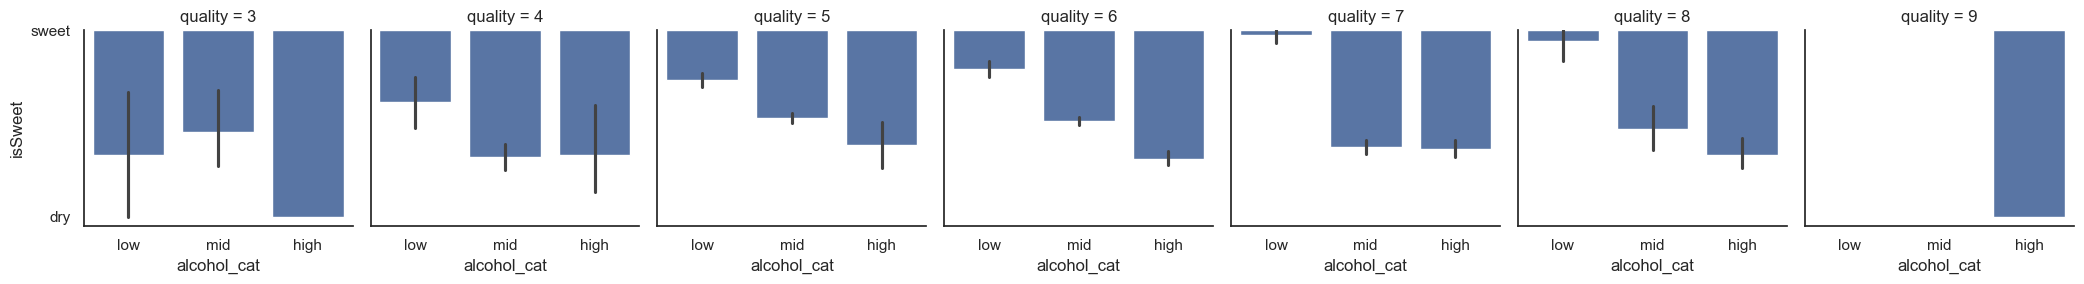

In [805]:
# Add a new column to each dataset to indicate the wine type
red_wine["wine_type"] = 0
white_wine["wine_type"] = 1

# Join the two datasets
wine_data = pd.concat([red_wine, white_wine], axis=0, ignore_index=True)


print("\n🔴Red Wine's Further Analysis🔴:")
grid = sns.FacetGrid(red_wine, col="quality")
grid.map(sns.barplot, "alcohol_cat", "isSweet", order=["low", "mid", "high"], color="darkred")

print("\n⚪White Wine's Further Analysis⚪:")
grid = sns.FacetGrid(white_wine, col="quality")
grid.map(sns.barplot, "alcohol_cat", "isSweet", order=["low", "mid", "high"], color="gainsboro")

print("\n🔴⚪Combined Dataset Analysis⚪🔴:")
grid = sns.FacetGrid(wine_data, col="quality")
grid.map(sns.barplot, "alcohol_cat", "isSweet", order=["low", "mid", "high"])

The graphs shows that high-quality(7-8) <span style="color:darkred">**red**</span> wines are mainly sweet and contain a `high` amount of alcohol. While high-quality <span style="color:gainsboro">**white**</span> wines have a higher amount of alcohol, but with a wider range in between `sweet` and `dry`, however, mainly hovering around `sweet`.

As for the combined set, since the amount of <span style="color:gainsboro">**white**</span> wine samples is much higher than the <span style="color:darkred">**red**</span> samples, the results are very similar to the <span style="color:gainsboro">**white**</span> wine set, with a slight but greater concentration in sweeter than dry samples. 

<br>

# Task 2




For this task I found the variables that could be most useful for the learning phase of a ML(Machine Learning) model. In order to find these features, I analyzed each pair, and each variable's correlation to the target variable(`quality`).


To execute this Correlation Analysis, I displayed two methods of finding these values, similarly to **Task 1**, where the first representation is raw data, and the second is a visualization of the correlations. The graph illustrated is a "heatmap", which represents correlations, and the type of correlation between the pairs (i.e. positive, negative, uncorrelated), for further information, see [seaborn's documentation](https://seaborn.pydata.org/generated/seaborn.heatmap.html) (Seaborn, 2025):
1. I used `pandas`' `DataFrame.corr()` method to automatically generate the correlation value of each feature from each set. 
2. I used `seaborn`'s `heatmap` method to generate the columns' correlation values, but also to visualize the values from each pair in the sets.

🔴Red Wine's fixed acidity Correlation with Quality🔴:
0.1240516491132243
🔴Red Wine's volatile acidity Correlation with Quality🔴:
-0.39055778026400734
🔴Red Wine's citric acid Correlation with Quality🔴:
0.22637251431804142
🔴Red Wine's residual sugar Correlation with Quality🔴:
0.013731637340066277
🔴Red Wine's chlorides Correlation with Quality🔴:
-0.12890655993005273
🔴Red Wine's free sulfur dioxide Correlation with Quality🔴:
-0.05065605724427633
🔴Red Wine's total sulfur dioxide Correlation with Quality🔴:
-0.18510028892653785
🔴Red Wine's density Correlation with Quality🔴:
-0.17491922778334884
🔴Red Wine's pH Correlation with Quality🔴:
-0.05773139120538215
🔴Red Wine's sulphates Correlation with Quality🔴:
0.2513970790692614
🔴Red Wine's alcohol Correlation with Quality🔴:
0.4761663240011362
🔴Red Wine's wine_type Correlation with Quality🔴:
nan
⚪White Wine's fixed acidity Correlation with Quality⚪:
-0.11366283071301796
⚪White Wine's volatile acidity Correlation with Quality⚪:
-0.19472296892113428
⚪

C:\Users\dario\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\dario\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


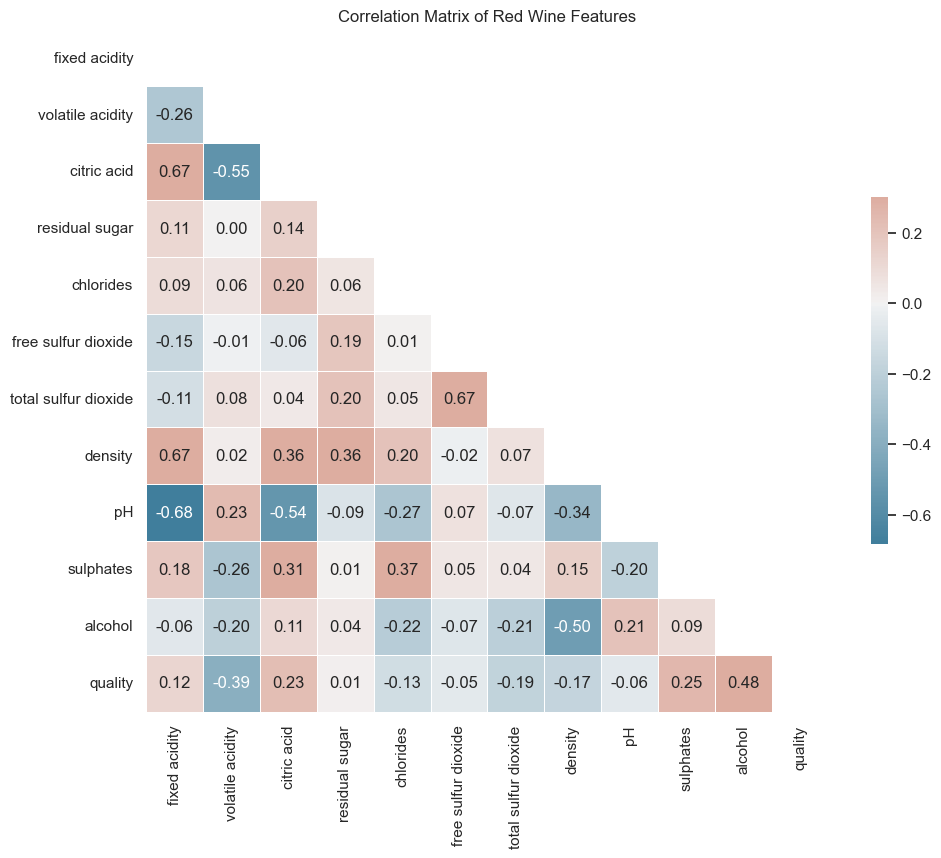

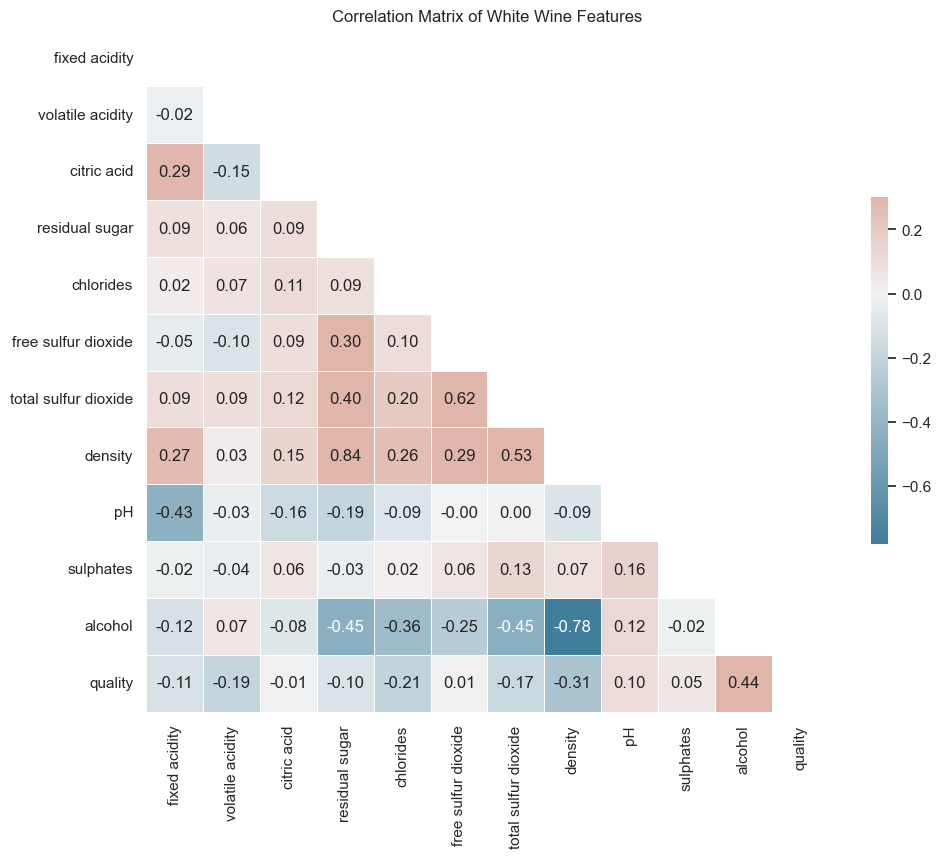

In [ ]:
# Correlation of features with quality in red wine dataset as text
for i in red_wine.columns:
    if i != "quality" and i != "alcohol_cat" and i != "isSweet":
        print(f"🔴Red Wine's {i} Correlation with Quality🔴:")
        print(red_wine[str(i)].corr(red_wine["quality"], method='pearson')) 

# Correlation of features with quality in white wine dataset as text
for i in white_wine.columns:
    if i != "quality" and i != "alcohol_cat" and i != "isSweet":
        print(f"⚪White Wine's {i} Correlation with Quality⚪:")
        print(white_wine[str(i)].corr(white_wine["quality"]))
        
# Create subsets of float features for correlation analysis
red_wine_subset = red_wine[["fixed acidity",	"volatile acidity", "citric acid", 
                           "residual sugar", "chlorides", "free sulfur dioxide", 
                           "total sulfur dioxide", "density", "pH", "sulphates",
                           "alcohol", "quality"]]
white_wine_subset = white_wine[["fixed acidity",	"volatile acidity", "citric acid", 
                           "residual sugar", "chlorides", "free sulfur dioxide", 
                           "total sulfur dioxide", "density", "pH", "sulphates",
                           "alcohol", "quality"]]

# Calculate the correlation matrix for the red wine subset
red_wine_corr = red_wine_subset.corr()
mask = np.triu(np.ones_like(red_wine_corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(red_wine_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")
plt.title("Correlation Matrix of Red Wine Features")
plt.show()


# Calculate the correlation matrix for the white wine subset
white_wine_corr = white_wine_subset.corr()
plt.figure(figsize=(11, 9))
mask = np.triu(np.ones_like(white_wine_corr, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(white_wine_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")
plt.title("Correlation Matrix of White Wine Features")
plt.show()

 

**In 🔴Red Wine🔴**:

* Most Positive Correlations(correlation > 0.10): **Alcohol**, **Sulphates**, **Citric Acid**, **Fixed Acidity**

* Most Negative Correlations(correlation < -0.10): **Volatile Acidity**, **Chlorides**, **Total Sulfur Dioxide**, **Density**

* Uncorrelated features (-0.10 < correlation < 0.10): **Residual Sugar**, **Free Sulfur Dioxide**, **pH**

    To see these correlations for <span style="color:darkred">**red**</span> wine was quite surprising, since I assumed **Residual Sugar** would have a higher correlation with quality, due to its impact in the graphs seen in **Task 1**

<br> 

<br>

**In ⚪White Wine⚪**:

* Most Positive Correlations(correlation > 0.10): **Alcohol**

* Most Negative Correlations(correlation < -0.10): **Fixed Acidity**, **Volatile Acidity**, **Chlorides**, **Total Sulfur Dioxide**, **Density**

* Uncorrelated features (-0.10 <= correlation <= 0.10): **Citric Acid**, **Residual Sugar**, **Free Sulfur Dioxide**, **pH**, **Sulphates**

    Like with <span style="color:darkred">**red**</span> wine, I was surprised that `residual sugar` was uncorrelated with `quality` for the <span style="color:gainsboro">**white**</span> wine samples as well. This set also contains more negative correlations than positive (only one which is `alcohol`), however, this is not necessarily an issue, since the wine's quality could increase by having the quantity of these features reduced and vice versa.


# Task 3

For this task, I will create a predictive model to predict `quality` based on the <span style="color:darkred">**red**</span> and <span style="color:gainsboro">**white**</span> wine datasets. 

The learning approach for this task will be **regression**, instead of **classification**, which means `quality` will be considered a continuous variable, instead of being altered to introduce binary classification and thresholds. 

To solve this **regression problem** I have combined both wine sets into one, with a subset of the most positively correlated features from the combined set, based on the **Correlation Matrix** above. 

In [807]:

# Add a new column to each dataset to indicate the wine type
red_wine["wine_type"] = 0
white_wine["wine_type"] = 1

# Join the two datasets
wine_data = pd.concat([red_wine, white_wine], axis=0, ignore_index=True)

# Create a subset of the dataset features based on the correlation analysis
wine_data_subset = wine_data[["fixed acidity", "citric acid", "sulphates", "alcohol", "quality"]]

# Define the features and target variable
data = wine_data_subset.drop(columns=["quality"])
labels = wine_data_subset["quality"]

# Split the dataset into training and testing sets
data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.2, random_state=42)


# Scale the train and test data
scaler = StandardScaler()

# Fit and transform train and test data
data_train_scaled = scaler.fit_transform(data_train)
data_test_scaled = scaler.transform(data_test)

To find the best parameters for our model (which will be a `RandomForestRegressor`, see [sklearn.ensemble](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)) (Scikit-learn,2025), I will perform a **grid search** with **k-folds**(5) to find the best parameters that would allow the model to learn and predict as accurately as possible.

In [808]:
# Initialize Random Forest for regression problem
random_forest = RandomForestRegressor(n_estimators=100, random_state=42) 

parameters_to_tune = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['sqrt', 'log2', None]
}

# Define the K-Fold cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform Grid Search with parameter and k-folds
grid_search = GridSearchCV(estimator=random_forest,
                           param_grid=parameters_to_tune,
                           cv=kf,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1,
                           verbose=2)

# Fit the model with the training data
grid_search.fit(data_train_scaled, labels_train)

print(f"Best parameters set found: {grid_search.best_params_}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters set found: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


Now that we have the best possible parameters, let's fit the random forest with these and test the model by calculating its **Mean Squared Error(MSE)** and **r<sup>2</sup>(Coefficient of Determination)**:

* **MSE**: Measures the average of the squared differences between values **predicted** by a model and the true values (Encord, 2025). Basically, it displays the average incorrect predictions the model makes in a value from 0 to 1. Therefore, this value ideally should be as close to 0 as possible, which would mean the model makes very small mistakes when predicting.[]

* **r<sup>2</sup> (or R<sup>2</sup>)**: Represents how much of the variation in the actual values is **explained** by the model (NVIDIA Developer Platform, 2023). This means how much of the predictions was the actual model's reasoning, in a value also from 0 to 1. Therefore, these results should ideally be as close to 1 as as possible, which would mean the model predicts independent variables from dependent variables exceptionally. 

<br>

# Extension 2 

Based on the correlation matrix from **Task 2**, below are the variables with the highest correlation and most relevance (i.e. no residual sugar). 

Since they are highly correlated with each other, having these together in the same model should be avoided. To find which is most effective, two models will be trained, and compared in performance to see which is more ideal for learning:

**Positive Correlated variables**:
1. density & total sulfur dioxide
2. total sulfur dioxide & free sulfur dioxide

#### 1. Testing Density and Total Sulfur Dioxide Pair:

In [809]:
# Model 1: Using only 'density' 
wine_data_subset_density = wine_data[["fixed acidity", "citric acid", "pH", "sulphates",
                    "alcohol", "quality", "free sulfur dioxide", "density"]]
data_density = wine_data_subset_density.drop(columns=["quality"])
labels_density = wine_data_subset_density["quality"]
data_train_density, data_test_density, labels_train_density, labels_test_density = train_test_split(data_density, labels_density, test_size=0.2, random_state=42)
scaler_density = StandardScaler()
data_train_scaled_density = scaler_density.fit_transform(data_train_density)
data_test_scaled_density = scaler_density.transform(data_test_density)

# Initialize Random Forest for best parameters
best_params = grid_search.best_params_
random_forest_density = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                                       max_depth=best_params['max_depth'],
                                       min_samples_split=best_params['min_samples_split'],
                                       min_samples_leaf=best_params['min_samples_leaf'],
                                       max_features=best_params['max_features'],
                                       random_state=42)

random_forest_density.fit(data_train_scaled_density, labels_train_density)
labels_pred_density = random_forest_density.predict(data_test_scaled_density)
mse_density = mean_squared_error(labels_test_density, labels_pred_density)
r2_density = r2_score(labels_test_density, labels_pred_density)

print("\nModel using only 'density'")
print(f"Test Set Mean Squared Error (density): {mse_density}")
print(f"Test Set R-squared (density): {r2_density}")

# Model 2: Using only 'total sulfur dioxide'
wine_data_subset_tsd = wine_data[["fixed acidity", "citric acid", "pH", "sulphates",
                                   "alcohol", "quality", "free sulfur dioxide", "total sulfur dioxide"]]

data_tsd = wine_data_subset_tsd.drop(columns=["quality"])
labels_tsd = wine_data_subset_tsd["quality"]
data_train_tsd, data_test_tsd, labels_train_tsd, labels_test_tsd = train_test_split(data_tsd, labels_tsd, test_size=0.2, random_state=42)
scaler_tsd = StandardScaler()
data_train_scaled_tsd = scaler_tsd.fit_transform(data_train_tsd)
data_test_scaled_tsd = scaler_tsd.transform(data_test_tsd)

# Initialize Random Forest for best parameters
random_forest_tsd = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                                       max_depth=best_params['max_depth'],
                                       min_samples_split=best_params['min_samples_split'],
                                       min_samples_leaf=best_params['min_samples_leaf'],
                                       max_features=best_params['max_features'],
                                       random_state=42)

random_forest_tsd.fit(data_train_scaled_tsd, labels_train_tsd)
labels_pred_tsd = random_forest_tsd.predict(data_test_scaled_tsd)
mse_tsd = mean_squared_error(labels_test_tsd, labels_pred_tsd)
r2_tsd = r2_score(labels_test_tsd, labels_pred_tsd)

print("\nModel using only 'total sulfur dioxide'")
print(f"Test Set Mean Squared Error (total sulfur dioxide): {mse_tsd}")
print(f"Test Set R-squared (total sulfur dioxide): {r2_tsd}")


Model using only 'density'
Test Set Mean Squared Error (density): 0.37660715384615384
Test Set R-squared (density): 0.49006998391211276

Model using only 'total sulfur dioxide'
Test Set Mean Squared Error (total sulfur dioxide): 0.3788746153846154
Test Set R-squared (total sulfur dioxide): 0.48699981732876974


The given results, show the variables make very little impact on the overall results since when using only one of the pair, the results don't change as much as expected. This means the pair of variables is not useful, which makes sense, since their correlation with `quality` is negative.

#### 2. Testing Total Sulfur Dioxide and Free Sulfur Dioxide Pair:

In [810]:
# Model 3: Using only 'total sulfur dioxide' 
wine_data_subset_tsd = wine_data[["fixed acidity", "citric acid", "pH", "sulphates",
                                   "alcohol", "quality", "residual sugar", "total sulfur dioxide"]]

data_tsd = wine_data_subset_tsd.drop(columns=["quality"])
labels_tsd = wine_data_subset_tsd["quality"]
data_train_tsd, data_test_tsd, labels_train_tsd, labels_test_tsd = train_test_split(data_tsd, labels_tsd, test_size=0.2, random_state=42)
scaler_tsd = StandardScaler()
data_train_scaled_tsd = scaler_tsd.fit_transform(data_train_tsd)
data_test_scaled_tsd = scaler_tsd.transform(data_test_tsd)

# Initialize Random Forest for best parameters
random_forest_tsd = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                                       max_depth=best_params['max_depth'],
                                       min_samples_split=best_params['min_samples_split'],
                                       min_samples_leaf=best_params['min_samples_leaf'],
                                       max_features=best_params['max_features'],
                                       random_state=42)

random_forest_tsd.fit(data_train_scaled_tsd, labels_train_tsd)
labels_pred_tsd = random_forest_tsd.predict(data_test_scaled_tsd)
mse_tsd = mean_squared_error(labels_test_tsd, labels_pred_tsd)
r2_tsd = r2_score(labels_test_tsd, labels_pred_tsd)

print("\nModel using only 'total sulfur dioxide'")
print(f"Test Set Mean Squared Error (total sulfur dioxide): {mse_tsd}")
print(f"Test Set R-squared (total sulfur dioxide): {r2_tsd}")

# Model 4: Using only 'free sulfur dioxide' 
wine_data_subset_fsd = wine_data[["fixed acidity", "citric acid", "pH", "sulphates",
                                   "alcohol", "quality", "residual sugar", "free sulfur dioxide"]]

data_fsd = wine_data_subset_fsd.drop(columns=["quality"])
labels_fsd = wine_data_subset_fsd["quality"]
data_train_fsd, data_test_fsd, labels_train_fsd, labels_test_fsd = train_test_split(data_fsd, labels_fsd, test_size=0.2, random_state=42)
scaler_fsd = StandardScaler()
data_train_scaled_fsd = scaler_fsd.fit_transform(data_train_fsd)
data_test_scaled_fsd = scaler_fsd.transform(data_test_fsd)

# Initialize Random Forest for best parameters
random_forest_fsd = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                                       max_depth=best_params['max_depth'],
                                       min_samples_split=best_params['min_samples_split'],
                                       min_samples_leaf=best_params['min_samples_leaf'],
                                       max_features=best_params['max_features'],
                                       random_state=42)

random_forest_fsd.fit(data_train_scaled_fsd, labels_train_fsd)
labels_pred_fsd = random_forest_fsd.predict(data_test_scaled_fsd)
mse_fsd = mean_squared_error(labels_test_fsd, labels_pred_fsd)
r2_fsd = r2_score(labels_test_fsd, labels_pred_fsd)

print("\nModel using only 'free sulfur dioxide'")
print(f"Test Set Mean Squared Error (free sulfur dioxide): {mse_fsd}")
print(f"Test Set R-squared (free sulfur dioxide): {r2_fsd}")


Model using only 'total sulfur dioxide'
Test Set Mean Squared Error (total sulfur dioxide): 0.3848416923076923
Test Set R-squared (total sulfur dioxide): 0.4789203329103052

Model using only 'free sulfur dioxide'
Test Set Mean Squared Error (free sulfur dioxide): 0.3805520961538461
Test Set R-squared (free sulfur dioxide): 0.4847284908632338


<br>

These results also show a very small impact, therefore, comparing both pair's results, density is the most effective variable of the three. This is due to density model's MSE scoring lower, and r<sup>2</sup> scoring higher; than the other two models.  

Even though density's impact is very small, combining it with the other highly correlated variables to `quality` in the **Correlation Matrix**, could lead to much better results:

Therefore, a suitable subset of variables for further learning would be:

        wine_data_subset = wine_data[["fixed acidity", "density", "citric acid", "sulphates","alcohol", "quality"]]

<br>

# Task 4
In order to evaluate the regression model with our new subset of features, I used **K-Fold Cross Validation** to calculate in 5 different folds, the **MSE** and **r<sup>2</sup>** on the model's performance:

In [811]:
# Perform cross-validation and get the MSE scores
neg_mse_scores = cross_val_score(random_forest, data_train_scaled, labels_train, cv=kf, scoring='neg_mean_squared_error')
mse_scores = -neg_mse_scores 

# Perform cross-validation and get the R-squared scores
r2_scores = cross_val_score(random_forest, data_train_scaled, labels_train, cv=kf, scoring='r2')

print("\nK-Fold Cross-Validation on Training Set:")
print(f"MSE:{mse_scores}")
print(f"R-squared: {r2_scores}\n")

print(f"MSE Scores Mean: {mse_scores.mean()}")
print(f"r2 Scores Mean: {r2_scores.mean()}")

# Perform cross-validation and get the MSE scores
neg_mse_scores = cross_val_score(random_forest, data_test_scaled, labels_test, cv=kf, scoring='neg_mean_squared_error')
mse_scores = -neg_mse_scores 

# Perform cross-validation and get the R-squared scores
r2_scores = cross_val_score(random_forest, data_test_scaled, labels_test, cv=kf, scoring='r2')

print("\nK-Fold Cross-Validation on Test Set:")
print(f"MSE:{mse_scores}")
print(f"R-squared: {r2_scores}\n")

print(f"MSE Scores Mean: {mse_scores.mean()}")
print(f"r2 Scores Mean: {r2_scores.mean()}")


K-Fold Cross-Validation on Training Set:
MSE:[0.53130273 0.4773657  0.46239535 0.48019179 0.44432547]
R-squared: [0.36447983 0.35812467 0.40941838 0.36326225 0.38302963]

MSE Scores Mean: 0.47911620692044776
r2 Scores Mean: 0.37566295384227466

K-Fold Cross-Validation on Test Set:
MSE:[0.53582423 0.53061962 0.53969069 0.67744615 0.61041051]
R-squared: [0.21426239 0.28788616 0.19170749 0.21020696 0.16537722]

MSE Scores Mean: 0.5787982393589743
r2 Scores Mean: 0.21388804391788643


Unfortunately, the results produced by this subset, leads to an average of worse results in both **MSE** and **r<sup>2</sup>** evaluations.

Which means that the learning executed with this subset was **not as successful** as expected, but **wasn't a failure** either. 

As seen, the performance for training is far better than on the test set, which strongly suggests there is **overfitting** in the data.

Overfitting, is when the model has learned the training data, including its noise and specific patterns, too well (Scikit-learn, 2025). As a result, it fails to generalize effectively to new, unseen data (the test set), leading to higher prediction errors and a poorer explanation of the variance. 


Therefore, since overfitting is the main issue, this means the model could be improved by solving this issue. Which could be fixed by:

* **Simplifying the model:** Reducing the complexity of the model (e.g., reducing the number of trees or the depth of trees in a Random Forest).

* **Regularization:** Applying techniques to penalize overly complex models.

* **More data:** If possible, increasing the size of the training data could help the model learn more generalizable patterns.

If I had to train this model differently, I would experiment with different models instead of a `RandomForestRegressor` such as a `LogisticRegressor` which has **penalty** parameters that could help against **overfitting**. I would also use a different learning approach such as **classification**, through `sklearn.svm`'s `LinearSVC` model, which also has **penalty** parameters, and a more reduced complexity than `RandomForestRegressor` Since more data cannot be obtained in this case, I'm confident that using this new approaches will reveal improvements and more accurate predictions.